<a href="https://colab.research.google.com/github/stefanyy15/Analisis-Data/blob/main/Proyek_Analisis_Data_BikeSharing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Stefany Maurin
- **Email:** stefany21001@mail.unpad.ac.id
- **ID Dicoding:** stefanymaurin

## Menentukan Pertanyaan Bisnis

1. Bagaimana perubahan tren dalam bisnis "Bike Sharing" dari tahun 2011 - 2012 berdasarkan musim? Pada saat musim apa sewa sepeda paling diminati?
2. Bagaimana pengaruh hari (Weekend/weekday) dan jam terhadap sewa sepeda?
3. Bagaimana pengaruh temperature dan windspeed terhadap sewa sepeda sepeda?
4. Apa saja variabel yang memiliki korelasi cukup kuat terhadap jumlah sewa sepeda?
5. Prediksi jumlah sewa sepeda

## Import Semua Packages/Library yang Digunakan

In [1]:
from google.colab import drive
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from datetime import datetime, timedelta
from scipy.stats import linregress
from scipy.stats import chi2_contingency

## Data Wrangling

### Gathering Data

In [2]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
hour_df = pd.read_csv('/content/drive/My Drive/BANGKIT STEFANY!!!/Bikesharing/hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [4]:
day_df = pd.read_csv('/content/drive/My Drive/BANGKIT STEFANY!!!/Bikesharing/day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### Assessing Data

In [5]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [6]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [7]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Dari hasil di atas dapat dinyatakan bahwa data hour tidak memiliki missing value

In [8]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Dari hasil di atas dapat dinyatakan bahwa data day tidak memiliki missing value

In [9]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


### Cleaning Data

In [10]:
datetime_columns = ["dteday"]
for column in datetime_columns:
  hour_df[column] = pd.to_datetime(hour_df[column])

Mengubah tipe variabel dari "dteday" menjadi tipe datetime

In [11]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [12]:
datetime1_columns = ["dteday"]
for column in datetime1_columns:
  day_df[column] = pd.to_datetime(day_df[column])

In [13]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

## Exploratory Data Analysis (EDA)


### Explore (Hour)

In [14]:
hour_df.describe(include="all")

<ipython-input-14-55b8ff84265d>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  hour_df.describe(include="all")


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000


In [15]:
h_season=hour_df.groupby(by="season").agg({
    "cnt": "nunique"
})
h_season

,cnt
season,
1,482
2,721
3,760
4,690


In [16]:
hour_df.groupby(by=["season", "weathersit"]).agg({
    "cnt": "nunique"
})

cnt
season weathersit     
1      1           454
       2           315
       3           144
       4             3
2      1           682
       2           447
       3           209
3      1           722
       2           452
       3           183
4      1           642
       2           478
       3           201

Tabel diatas untuk melihat jumlah sewa sepeda berdasarkan musim dan cuaca. Dapat disimpulkan bahwa jumlah sewa sepeda tertinggi berdasarkan data perjam berada di musim ke tiga (Fall) pada saat cuaca cerah

In [17]:
hour_df.groupby(by="hr").cnt.nunique().sort_values(ascending=False)

hr
17    494
18    471
8     467
19    423
16    414
14    385
12    383
15    383
13    377
7     374
20    360
11    337
9     322
10    312
21    294
22    252
23    196
6     187
0     162
1     120
2     100
3      60
5      58
4      25
Name: cnt, dtype: int64

In [18]:
trend_hr = hour_df.groupby(['hr'])['cnt'].mean().sort_values(ascending=False)
trend_hr

hr
17    461.452055
18    425.510989
8     359.011004
16    311.983562
19    311.523352
13    253.661180
12    253.315934
15    251.233196
14    240.949246
20    226.030220
9     219.309491
7     212.064649
11    208.143054
10    173.668501
21    172.314560
22    131.335165
23     87.831044
6      76.044138
0      53.898072
1      33.375691
2      22.869930
5      19.889819
3      11.727403
4       6.352941
Name: cnt, dtype: float64

### Explore (Day)

In [19]:
day_df.describe(include="all")

<ipython-input-19-51e59b52191b>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  day_df.describe(include="all")


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000


In [20]:
d_season=day_df.groupby(by="season").agg({
    "cnt": "nunique"
})
d_season

,cnt
season,
1,179
2,182
3,188
4,176


In [21]:
day_df.groupby(by=["season", "weathersit"]).agg({
    "cnt": "nunique"
})

cnt
season weathersit     
1      1           111
       2            65
       3             4
2      1           112
       2            68
       3             3
3      1           136
       2            48
       3             4
4      1           103
       2            65
       3            10

Tabel diatas untuk melihat jumlah sewa sepeda dilihat dari musim dan cuaca berdasarkan data per hari. Sama halnya dengan tabel sebelumnya, dapat disimpulkan bahwa jumlah sewa sepeda tertinggi berdasarkan data perhari juga berada di musim ke tiga (Fall) pada saat cuaca cerah sehingga data perjam maupun perhari telah sesuai

In [22]:
day_df.groupby(by=["weekday","holiday","workingday"]).cnt.nunique().sort_values(ascending=False)

weekday  holiday  workingday
0        0        0             104
2        0        1             103
3        0        1             102
5        0        1             102
6        0        0             102
4        0        1             101
1        0        1              90
         1        0              14
4        1        0               2
5        1        0               2
2        1        0               1
3        1        0               1
Name: cnt, dtype: int64

In [23]:
trend=day_df.groupby('mnth')['cnt'].sum().sort_values(ascending=False)
trend

mnth
8     351194
6     346342
9     345991
7     344948
5     331686
10    322352
4     269094
11    254831
3     228920
12    211036
2     151352
1     134933
Name: cnt, dtype: int64

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana perubahan tren dalam bisnis "Bike Sharing" dari tahun 2011 - 2012 berdasarkan musim? Pada musim apa jasa sewa sepeda paling diminati?

<Axes: title={'center': 'Tren Penyewaan Sepeda Bulanan'}, xlabel='Bulan', ylabel='Jumlah Penyewaan'>

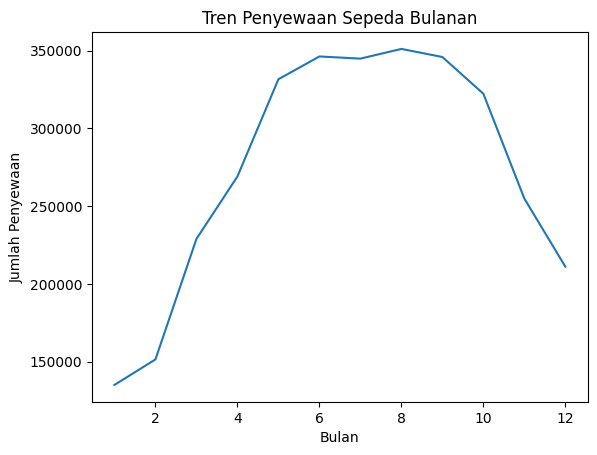

In [24]:
trend=day_df.groupby('mnth')['cnt'].sum()
trend.plot(kind='line', xlabel='Bulan', ylabel='Jumlah Penyewaan', title='Tren Penyewaan Sepeda Bulanan')

Melakukan analisis regresi

In [25]:
month = linregress(day_df['mnth'], day_df['cnt'])
month

LinregressResult(slope=157.1229927895806, intercept=3479.9327173253887, rvalue=0.27997711221927124, pvalue=1.2431117778653376e-14, stderr=19.953895877352334, intercept_stderr=147.18302634925405)

In [26]:
day_season = day_df.groupby(['season', 'yr'])['cnt'].sum().unstack() ; day_season
hour_season = hour_df.groupby(['season', 'yr'])['cnt'].sum().unstack() ; hour_season

yr,0,1
season,,
1,150000,321348
2,347316,571273
3,419650,641479
4,326137,515476


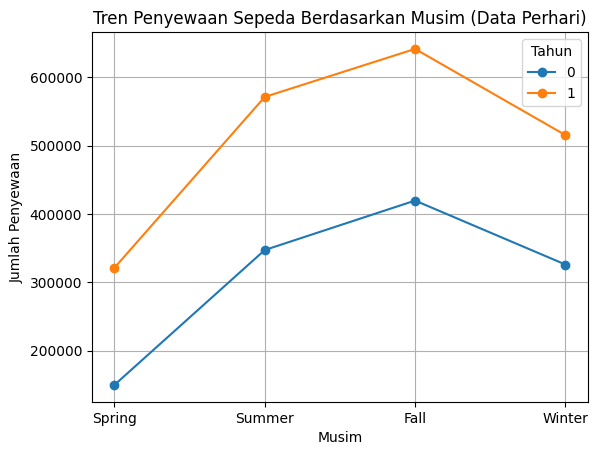

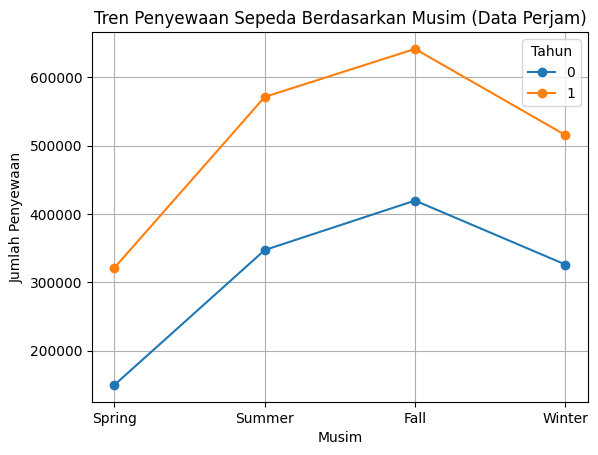

In [27]:
day_season.plot(kind='line', marker='o')
plt.xlabel('Musim')
plt.ylabel('Jumlah Penyewaan')
plt.title('Tren Penyewaan Sepeda Berdasarkan Musim (Data Perhari)')
plt.xticks(range(1, 5), ['Spring', 'Summer', 'Fall', 'Winter'])
plt.legend(title='Tahun')
plt.grid(True)
plt.show()

hour_season.plot(kind='line', marker='o')
plt.xlabel('Musim')
plt.ylabel('Jumlah Penyewaan')
plt.title('Tren Penyewaan Sepeda Berdasarkan Musim (Data Perjam)')
plt.xticks(range(1, 5), ['Spring', 'Summer', 'Fall', 'Winter'])
plt.legend(title='Tahun')
plt.grid(True)
plt.show()

In [28]:
season = linregress(day_df['season'], day_df['cnt'])
season

LinregressResult(slope=708.2258422154129, intercept=2736.206344674243, rvalue=0.4061003707986365, pvalue=2.1339966843418903e-30, stderr=59.025450141628205, intercept_stderr=161.2714891669504)

In [29]:
# Menggunakan uji chi-square untuk variabel kategorikal
# Contoh dengan dua variabel kategorikal
contingency_table = pd.crosstab(hour_df['season'], hour_df['cnt'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print('Chi-square:', chi2)
print('P-value:', p)

Chi-square: 4284.279167468825
P-value: 8.032149462264843e-86


### Pertanyaan 2: Bagaimana pengaruh hari (Weekend/weekday) dan jam terhadap jasa sewa sepeda?

In [30]:
day = hour_df.groupby(['workingday','weekday'])['cnt'].describe()
hourly = hour_df.groupby('hr')['cnt'].describe()
print("Statistik deskriptif berdasarkan hari (0:weekend, 1:weekday):")
print(day)
print("\nStatistik deskriptif berdasarkan jam:")
print(hourly)

Statistik deskriptif berdasarkan hari (0:weekend, 1:weekday):
                     count        mean         std   min     25%    50%  \
workingday weekday                                                        
0          0        2502.0  177.468825  168.167710   1.0   40.00  116.0   
           1         357.0  166.960784  162.468091   1.0   31.00  100.0   
           2          23.0   44.043478   41.126720   1.0   12.00   32.0   
           3          24.0  308.458333  202.209100  16.0  115.50  401.5   
           4          48.0   81.666667   77.569278   2.0   22.75   46.0   
           5          48.0  135.291667   95.655846   3.0   46.75  129.0   
           6        2512.0  190.209793  179.820569   1.0   42.00  129.0   
1          1        2122.0  186.568332  182.108719   1.0   37.00  142.5   
           2        2430.0  192.632099  188.117367   1.0   36.00  149.0   
           3        2451.0  189.981640  190.466915   1.0   36.00  142.0   
           4        2423.0  198.710277

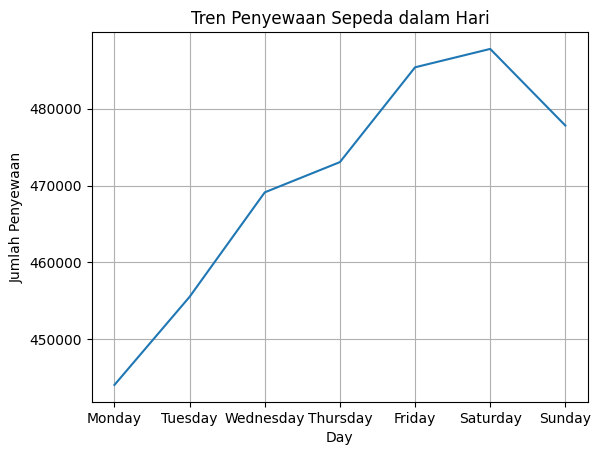

In [31]:
trend_hr = hour_df.groupby(['weekday'])['cnt'].sum()
plt.plot(trend_hr.index, trend_hr.values)
plt.xlabel('Day')
plt.ylabel('Jumlah Penyewaan')
plt.title('Tren Penyewaan Sepeda dalam Hari')
plt.xticks(range(7), ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.grid(True)
plt.show()

In [32]:
weekday = linregress(hour_df['weekday'], hour_df['cnt'])
weekday

LinregressResult(slope=2.432630599453439, intercept=182.1562374174539, rvalue=0.026899859990840515, pvalue=0.0003902662350920805, stderr=0.6857748597983743, intercept_stderr=2.476871916772852)

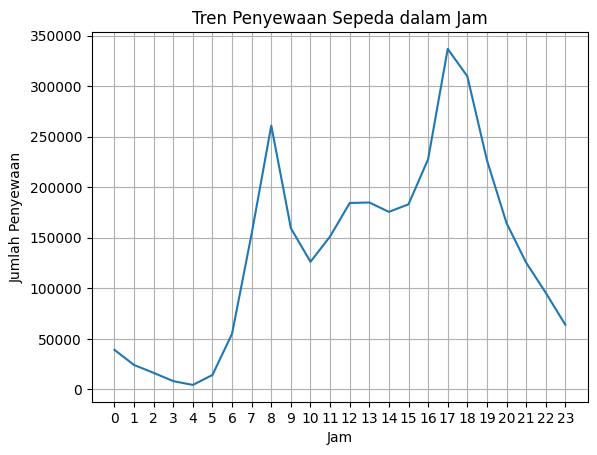

In [33]:
trend_hr = hour_df.groupby(['hr'])['cnt'].sum()
plt.plot(trend_hr.index, trend_hr.values)
plt.xlabel('Jam')
plt.ylabel('Jumlah Penyewaan')
plt.title('Tren Penyewaan Sepeda dalam Jam')
plt.xticks(range(24))
plt.grid(True)
plt.show()

In [34]:
hour = linregress(hour_df['hr'], hour_df['cnt'])
hour

LinregressResult(slope=10.337792169905953, intercept=70.09516701034597, rvalue=0.39407149778294304, pvalue=0.0, stderr=0.18290205568170625, intercept_stderr=2.4616043199675635)

### Pertanyaan 3 : Bagaimana pengaruh cuaca (temp, windspeed, weathersit) terhadap jasa sewa sepeda?

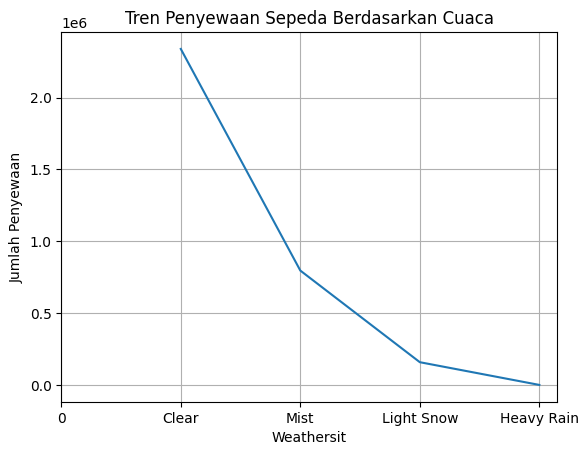

In [35]:
trend_weather = hour_df.groupby(['weathersit'])['cnt'].sum()
plt.plot(trend_weather.index, trend_weather.values)
plt.xlabel('Weathersit')
plt.ylabel('Jumlah Penyewaan')
plt.title('Tren Penyewaan Sepeda Berdasarkan Cuaca')
plt.xticks(range(5), ['0','Clear','Mist', 'Light Snow', 'Heavy Rain'])
plt.grid(True)
plt.show()

In [36]:
# Menggunakan uji chi-square untuk variabel kategorikal
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(hour_df['weathersit'], hour_df['cnt'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print('Chi-square:', chi2)
print('P-value:', p)

Chi-square: 2102.870661091951
P-value: 0.9999999999999489


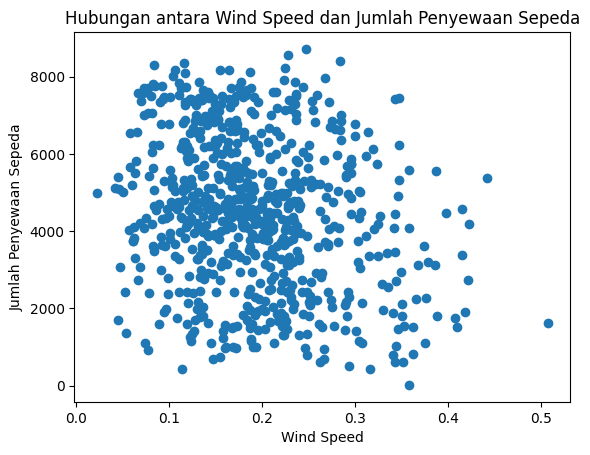

In [37]:
plt.scatter(day_df['windspeed'], day_df['cnt'])
plt.xlabel('Wind Speed')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.title('Hubungan antara Wind Speed dan Jumlah Penyewaan Sepeda')
plt.show()

In [38]:
windspeed = linregress(hour_df['windspeed'], hour_df['cnt'])
windspeed

LinregressResult(slope=138.23296243514466, intercept=163.18533236292936, rvalue=0.09323378392612529, pvalue=7.345742373568082e-35, stderr=11.198377196218367, intercept_stderr=2.531511257680889)

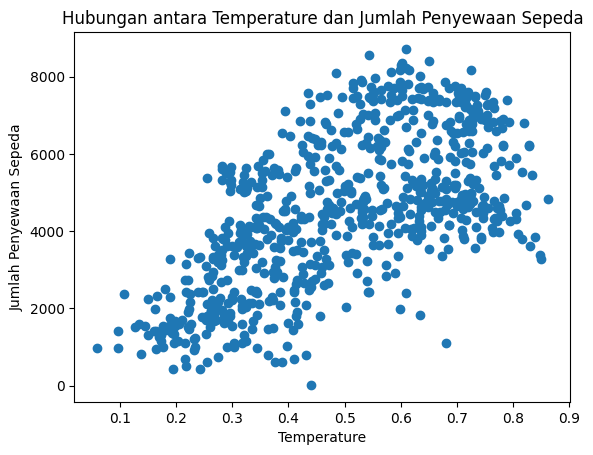

In [39]:
plt.scatter(day_df['temp'], day_df['cnt'])
plt.xlabel('Temperature')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.title('Hubungan antara Temperature dan Jumlah Penyewaan Sepeda')
plt.show()

In [40]:
temperature = linregress(day_df['temp'], day_df['cnt'])
temperature

LinregressResult(slope=6640.709998548635, intercept=1214.6421190294027, rvalue=0.6274940090334918, pvalue=2.8106223975900516e-81, stderr=305.18803094217907, intercept_stderr=161.1635310602571)

### Pertanyaan 4 : Apa saja variabel yang memiliki korelasi cukup kuat terhadap jumlah penyewaan sepeda?

Melakukan analisis korelasi pearson dengan fungsi 'corr'

In [41]:
correlation_matrix = hour_df.corr(method='pearson')
print(correlation_matrix)

             instant    season        yr      mnth        hr   holiday  \
instant     1.000000  0.404046  0.866014  0.489164 -0.004775  0.014723   
season      0.404046  1.000000 -0.010742  0.830386 -0.006117 -0.009585   
yr          0.866014 -0.010742  1.000000 -0.010473 -0.003867  0.006692   
mnth        0.489164  0.830386 -0.010473  1.000000 -0.005772  0.018430   
hr         -0.004775 -0.006117 -0.003867 -0.005772  1.000000  0.000479   
holiday     0.014723 -0.009585  0.006692  0.018430  0.000479  1.000000   
weekday     0.001357 -0.002335 -0.004485  0.010400 -0.003498 -0.102088   
workingday -0.003416  0.013743 -0.002196 -0.003477  0.002285 -0.252471   
weathersit -0.014198 -0.014524 -0.019157  0.005400 -0.020203 -0.017036   
temp        0.136178  0.312025  0.040913  0.201691  0.137603 -0.027340   
atemp       0.137615  0.319380  0.039222  0.208096  0.133750 -0.030973   
hum         0.009577  0.150625 -0.083546  0.164411 -0.276498 -0.010588   
windspeed  -0.074505 -0.149773 -0.0087

<ipython-input-41-f32f6671d131>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = hour_df.corr(method='pearson')


### Pertanyaan 6 : Lakukan Prediksi jumlah penyewaan sepeda untuk kedepannya

Melakukan Prediksi dengan Analisis Regresi Linear

In [42]:
# Memilih fitur dan target
X = hour_df[['season','hr','weathersit','temp','windspeed']]  # Pilih fitur-fitur yang relevan
y = hour_df['cnt']  # Target adalah jumlah penyewaan

# Memisahkan data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Membuat model regresi linier
model = LinearRegression()

# Melatih model
model.fit(X_train, y_train)

predictions = model.predict(X_test)

# Evaluasi model
mse = mean_squared_error(y_test, predictions)
mape = mean_absolute_percentage_error(y_test, predictions)
print("Mean Squared Error:", mse)
print("MAPE :", mape)
print("Prediksi:", predictions)

Mean Squared Error: 21924.563235255955
MAPE : 3.4184675675942042
Prediksi: [368.15987159 180.45484114  98.14995965 ...  81.35597417 205.13011401
 236.96403425]


## Conclusion

1. Bagaimana perubahan tren dalam bisnis "Bike Sharing" dari tahun 2011 - 2012 berdasarkan Musim? Pada Musim apa penyewaan sepeda paling diminati?

Conclusion: Berdasarkan eksplorasi dan visualisasi data tampaknya terdapat tren musiman dalam penyewaan sepeda. Peningkatan terjadi pada musim spring hingga fall yaitu pada bulan januari hingga september dengan jumlah tertinggi pada musim Fall tepatnya Bulan Agustus. Sedangkan ketika mulai memasuki musing winter (Oktober - Desember) terjadi penurunan penyewaan sepeda


2. Bagaimana pengaruh hari (Weekend/weekday) dan jam terhadap penyewaan sepeda?

Conclusion : Setelah dilakukan analisis data, hari sabtu merupakan hari dengan jumlah penyewaan sepeda tertinggi. Berdasarkan grafik, juga dapat dilihat bahwa pada pukul 17.00 merupakan puncak bagi orang - orang menyewa sepeda. Selain itu, pukul 8.00 menjadi opsi kedua dalam menyewa sepeda.

3. Bagaimana pengaruh cuaca terhadap penyewaan sepeda?

Conclusion : Cuaca cerah (clear) menjadi saat - saat terbaik untuk menyewa sepeda. Semakin buruk atau semakin gelap cuaca di udara maka jumlah penyewaan sepeda semakin berkurang. Selain itu, Temperature tinggi dan kelembaban udara rendah menyebabkan kenaikan permintaan penyewaan sepeda. Oleh karena itu, cuaca memiliki pengaruh terhadap jumlah penyewaan sepeda

4. Apa saja variabel yang memiliki korelasi cukup kuat terhadap jumlah penyewaan sepeda?

Conclusion : Variabel Casual dan Registered. Selain variabel yang tidak terlalu mempengaruhi jumlah penyewaan sepeda adalah variabel yang menyatakan hari seperti weekday, working day, holiday sehingga dapat dikatakan berdasarkan data orang - orang tidak terlalu memperhatikan hari ketika ingin menyewa sepeda.

6. Prediksi jumlah penyewaan sepeda

Conclusion : Berdasarkan efek musim, jam, cuaca, temperature dan kecepatan angin dilakukan prediksi terhadap jumlah penyewaan sepeda diperkiran dengan error 3.418 jumlah sepeda yang disewa untuk 1 jam kedepan sebanyak 369 sepeda

In [43]:
from google.colab import files
hour_df.to_csv("hour_data.csv", index=False)
files.download("hour_data.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [44]:
day_df.to_csv("day_data.csv", index=False)
files.download("day_data.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
pip install streamlit

In [45]:
%%writefile dashboard.py

Overwriting dashboard.py


In [46]:
! wget -q -O - ipv4.icanhazip.com

34.85.132.150


In [47]:
! streamlit run dashboard.py & npx localtunnel --port 8501

[..................] \ fetchMetadata: sill resolveWithNewModule localtunnel@2.0

npx: installed 22 in 2.905s
your url is: https://loose-cooks-lead.loca.lt

  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://34.85.132.150:8501

  Stopping...
^C


In [48]:
pip install pipreqsnb

In [49]:
!pip freeze > requirements.txt

In [50]:
from google.colab import files
files.download('requirements.txt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>